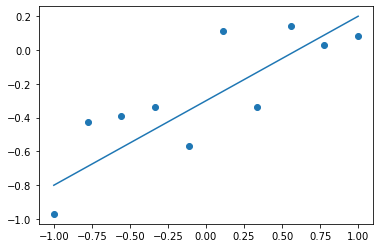

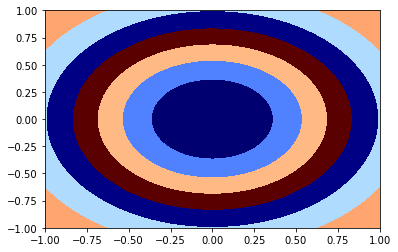

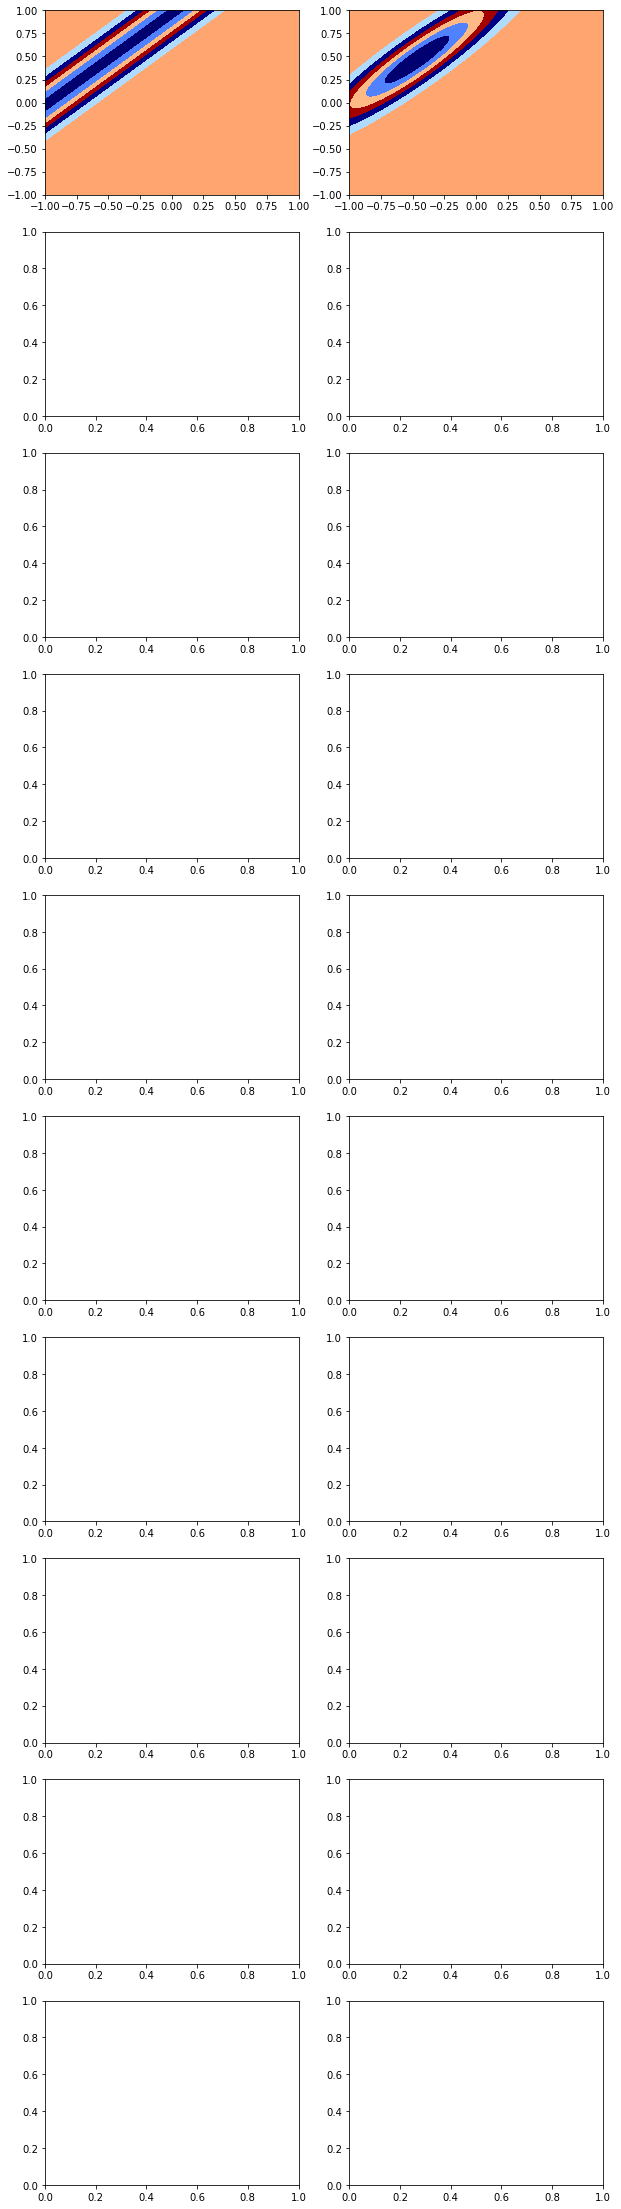

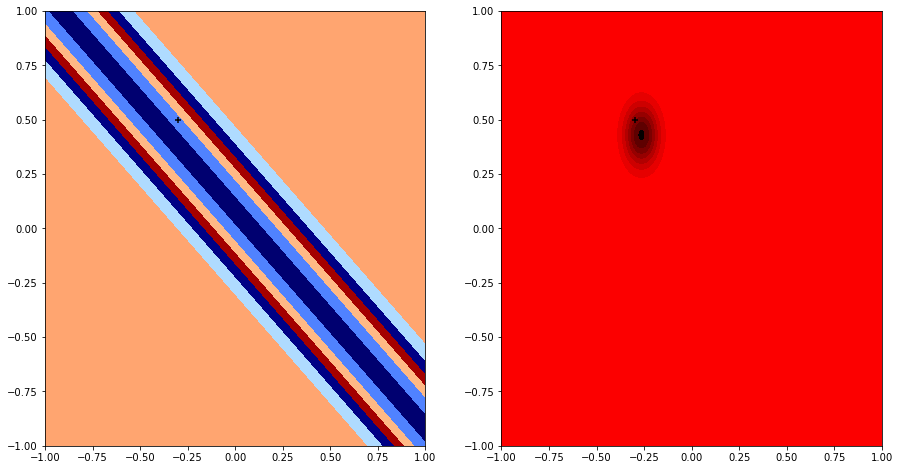

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from numpy.random import normal
from math import sqrt

m = 0.5
c = -0.3
sd = 0.2

np.random.seed(47)

x = np.linspace(-1, 1, 10)
y = []
for i in x:
    y.append(m*i + c + normal(0, sd))

plt.scatter(x, y)
plt.plot(x, m*x + c)
plt.savefig("fig-1.png")
plt.show()

def gaussian(x, y, w0, w1):
    k = sqrt(np.pi*2) * sd
    return k * np.exp(-0.5 * ((y - (w0 + w1*x))/sd)**2)

w0, w1 = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
g0 = norm.pdf(w0, 0, sqrt(0.5))
g1 = norm.pdf(w1, 0, sqrt(0.5))
prior = g0*g1
plt.contourf(w0, w1, prior, cmap = "flag")
plt.savefig("fig-2.png")
plt.show()

axis = 0
fig, axs = plt.subplots(10, 2, figsize = (10, 40))
for i, j in zip(x, y):
    mle = gaussian(i, j, w0, w1)
    posterior = prior * mle
    prior = posterior
    axs[axis, 0].contourf(w0, w1, mle, cmap="flag")
    axs[axis, 1].contourf(w0, w1, posterior, cmap="flag")
    axis += 1
    fig.savefig("fig-3.png")
    plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].contourf(w0, w1, mle, cmap="flag")
axes[0].scatter(c, m, c="black", marker="+")
axes[1].contourf(w0, w1, posterior, cmap="flag")
axes[1].scatter(c, m, c="black", marker="+")
fig.savefig("fig-4.png")
plt.show()